In [1]:
%load_ext autoreload
%autoreload 2
from helpers import *
from networks import *
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt

/Users/wlan/miniforge3/envs/pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Define some tunable variables

In [2]:
batch_size = 5 # > 10 is bad
lr = 0.001
mom = 0.5
epochs = 50
networ_type = 'CNN2' #FNN CNN1 CNN2
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [3]:
device

device(type='mps')

### Prepare data for training

In [4]:
train_x, train_y, test_x, test_y = init_data("train.csv", 0.7)
train_set = MyDataset(train_x, train_y)
test_set = MyDataset(test_x, test_y)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [5]:
num_features = train_set.x.shape[1]
num_features

305

### Build the neural network

In [6]:
net = eval(networ_type)()
net.to(device)
net

CNN2(
  (conv1): Conv2d(1, 6, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32856, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=1, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
)

### Train

In [7]:
criterion = nn.MSELoss()
# criterion = nn.L1Loss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=mom)

In [8]:
los = []
tlos = []
for epoch in range(epochs):
    tot_loss = 0.0
    net.train()
    for i, (inputs, labels) in enumerate(tqdm(train_loader), 0):
        inputs, labels = inputs.to(device), labels.to(device) # Move to GPU / CPU
        optimizer.zero_grad() # zero the parameter gradients

        labels = labels.unsqueeze(-1).unsqueeze(-1)
        # forward + backward + optimize
        l = [m.outer(m) for m in inputs]
        inputs = torch.empty((len(l),)+l[0].shape, dtype=torch.float32, device=device)
        for j in range(len(l)):
            inputs[j] = l[j]
        inputs = inputs.unsqueeze(1)
        outputs = net(inputs).unsqueeze(-1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        tot_loss += loss.item()
    # print(tot_loss)
    ttot_loss = 0.0
    net.eval()
    for i, (inputs, labels) in enumerate(test_loader, 0):
        inputs, labels = inputs.to(device), labels.to(device) # Move to GPU / CPU
        with torch.no_grad():
            labels = labels.unsqueeze(-1).unsqueeze(-1)
            l = [m.outer(m) for m in inputs]
            inputs = torch.empty((len(l),)+l[0].shape, dtype=torch.float32, device=device)
            for j in range(len(l)):
                inputs[j] = l[j]
            inputs = inputs.unsqueeze(1)
            outputs = net(inputs).unsqueeze(-1)
            loss = criterion(outputs, labels)
        ttot_loss += loss.item()
    los.append(tot_loss)
    tlos.append(ttot_loss)
    print(epoch, tot_loss, ttot_loss)

100%|██████████| 205/205 [00:02<00:00, 84.59it/s]


0 180.35887713194938 79.20846589654684


100%|██████████| 205/205 [00:02<00:00, 101.08it/s]


1 136.06838171204436 56.94808081910014


100%|██████████| 205/205 [00:02<00:00, 101.82it/s]


2 456.5568489152938 110.07370857149363


100%|██████████| 205/205 [00:02<00:00, 101.24it/s]


3 249.37952861667145 86.5150614976883


100%|██████████| 205/205 [00:01<00:00, 103.04it/s]


4 435.47547381184995 87.88894970715046


100%|██████████| 205/205 [00:01<00:00, 102.65it/s]


5 207.73816001066007 94875.3136575073


100%|██████████| 205/205 [00:01<00:00, 104.23it/s]


6 217.41949341725558 85.43602769821882


100%|██████████| 205/205 [00:02<00:00, 98.78it/s] 


7 206.52788210927974 85.2539834305644


100%|██████████| 205/205 [00:02<00:00, 100.98it/s]


8 206.66263693221845 85.41769812256098


100%|██████████| 205/205 [00:02<00:00, 102.14it/s]


9 206.05553480796516 84.89756426215172


100%|██████████| 205/205 [00:02<00:00, 100.14it/s]


10 216.3455792334862 85.5428770929575


100%|██████████| 205/205 [00:02<00:00, 100.13it/s]


11 206.57233993709087 85.51720270514488


100%|██████████| 205/205 [00:02<00:00, 99.06it/s]


12 206.63362954510376 85.52320923656225


100%|██████████| 205/205 [00:02<00:00, 101.17it/s]


13 206.76738771423697 85.51453954726458


100%|██████████| 205/205 [00:02<00:00, 101.59it/s]


14 206.56215281272307 85.52073127031326


100%|██████████| 205/205 [00:01<00:00, 106.20it/s]


15 206.56529692560434 85.51468052715063


100%|██████████| 205/205 [00:01<00:00, 103.16it/s]


16 206.6682557342574 85.52209930121899


100%|██████████| 205/205 [00:02<00:00, 102.43it/s]


17 206.73611824167892 85.51991180330515


100%|██████████| 205/205 [00:02<00:00, 101.85it/s]


18 206.63585072453134 85.51945886015892


100%|██████████| 205/205 [00:02<00:00, 99.39it/s] 


19 206.68200294370763 85.51969830691814


100%|██████████| 205/205 [00:01<00:00, 103.96it/s]


20 206.66909845755436 85.51970852166414


100%|██████████| 205/205 [00:02<00:00, 101.95it/s]


21 206.6503652287647 85.51874116808176


100%|██████████| 205/205 [00:02<00:00, 102.44it/s]


22 206.69291914394125 85.51757472008467


100%|██████████| 205/205 [00:01<00:00, 103.29it/s]


23 206.62150009931065 85.5189286917448


100%|██████████| 205/205 [00:02<00:00, 101.44it/s]


24 206.6927701414097 85.51754104346037


100%|██████████| 205/205 [00:02<00:00, 102.49it/s]


25 206.6537257193122 85.51720269024372


100%|██████████| 205/205 [00:02<00:00, 101.24it/s]


26 206.576395903714 85.51323348283768


100%|██████████| 205/205 [00:02<00:00, 101.76it/s]


27 206.74534318130463 85.5124537050724


100%|██████████| 205/205 [00:01<00:00, 102.62it/s]


28 206.66354109183885 85.52337495982647


100%|██████████| 205/205 [00:02<00:00, 99.42it/s] 


29 206.62461991864257 85.52368234097958


100%|██████████| 205/205 [00:01<00:00, 102.68it/s]


30 206.6666919819545 85.52352372556925


100%|██████████| 205/205 [00:01<00:00, 102.95it/s]


31 206.63025663071312 85.52393773943186


100%|██████████| 205/205 [00:01<00:00, 103.20it/s]


32 206.5645905530546 85.52447213232517


100%|██████████| 205/205 [00:02<00:00, 100.40it/s]


33 206.65271112835035 85.52352795749903


100%|██████████| 205/205 [00:02<00:00, 99.62it/s]


34 206.68433243781328 85.52436903864145


100%|██████████| 205/205 [00:02<00:00, 100.80it/s]


35 206.64297461370006 85.52572536468506


100%|██████████| 205/205 [00:01<00:00, 104.63it/s]


36 206.65390144172125 85.52192902565002


100%|██████████| 205/205 [00:02<00:00, 101.99it/s]


37 206.56472336454317 85.5249208882451


100%|██████████| 205/205 [00:02<00:00, 101.74it/s]


38 206.6956985052675 85.52138844132423


100%|██████████| 205/205 [00:01<00:00, 103.26it/s]


39 206.72813323140144 85.5218803063035


100%|██████████| 205/205 [00:01<00:00, 105.84it/s]


40 206.5660594503861 85.52531183511019


100%|██████████| 205/205 [00:02<00:00, 100.21it/s]


41 206.5457810149528 85.5239774286747


100%|██████████| 205/205 [00:02<00:00, 101.10it/s]


42 206.61266054748558 85.52452002465725


100%|██████████| 205/205 [00:02<00:00, 100.76it/s]


43 206.66217632591724 85.52379608154297


100%|██████████| 205/205 [00:02<00:00, 101.08it/s]


44 206.5830956720747 85.52512618899345


100%|██████████| 205/205 [00:02<00:00, 101.81it/s]


45 206.6877904443536 85.52251140028238


100%|██████████| 205/205 [00:01<00:00, 103.27it/s]


46 206.65257862582803 85.52268827706575


100%|██████████| 205/205 [00:02<00:00, 98.23it/s] 


47 206.6205787837971 85.52340675145388


100%|██████████| 205/205 [00:02<00:00, 99.39it/s] 


48 206.54755147569813 85.52746704220772


100%|██████████| 205/205 [00:01<00:00, 104.86it/s]


49 206.54532641242258 85.52666569501162


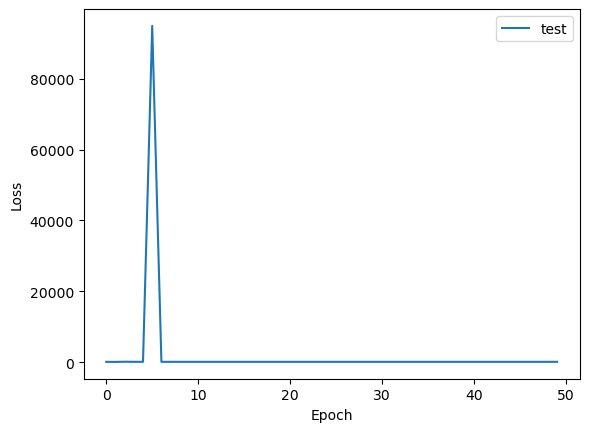

In [18]:
plt.plot(los, label="train")
plt.plot(tlos, label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
net.eval()
all_loss_train = []
with torch.no_grad():
    tot_loss = 0
    for i, (inputs, labels) in enumerate(tqdm(train_loader), 0):
        inputs, labels = inputs.to(device), labels.to(device)
        l = [m.outer(m) for m in inputs]
        inputs = torch.empty((batch_size,)+l[0].shape, dtype=torch.float32, device=device)
        for j in range(len(l)):
            inputs[j] = l[j]
        inputs = inputs.unsqueeze(1) #.to_sparse()
        outputs = net(inputs).ravel()
        all_loss_train.extend((abs(outputs - labels) / abs(labels)).tolist())
        

100%|██████████| 205/205 [00:00<00:00, 301.76it/s]


In [11]:
print(test_set.x.shape, test_set.x.device)
print(test_set.y.shape, test_set.y.device)

torch.Size([439, 305]) cpu
torch.Size([439]) cpu


In [12]:
all_loss_test = []
with torch.no_grad():
    tot_loss = 0
    for i, (inputs, labels) in enumerate(tqdm(test_loader), 0):
        inputs, labels = inputs.to(device), labels.to(device)
        l = [m.outer(m) for m in inputs]
        inputs = torch.empty((len(l),)+l[0].shape, dtype=torch.float32, device=device)
        for j in range(len(l)):
            inputs[j] = l[j]
        inputs = inputs.unsqueeze(1)
        outputs = net(inputs).ravel()
        all_loss_test.extend((abs(outputs - labels) / abs(labels)).tolist())
    

100%|██████████| 88/88 [00:00<00:00, 268.21it/s]


In [13]:
all_loss_train = np.array(all_loss_train)
all_loss_test = np.array(all_loss_test)


In [14]:
len(np.where(all_loss_train < 1)[0]) / len(all_loss_train), len(np.where(all_loss_test < 1)[0]) / len(all_loss_test)

(0.6136585365853658, 0.6264236902050114)

In [15]:
good_pred_train = all_loss_train[np.where(all_loss_train < 1)]
good_pred_test = all_loss_test[np.where(all_loss_test < 1)]
good_pred_train.mean(), good_pred_train.std(), good_pred_test.mean(), good_pred_test.std()

(0.9682794535956056,
 0.08413795442037958,
 0.9626429998874664,
 0.10632237286735671)

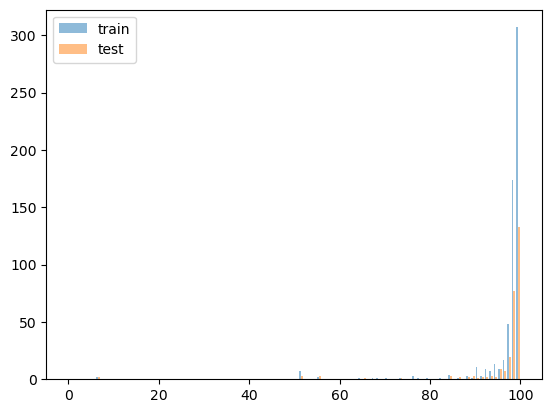

In [16]:
bins = range(101)
plt.hist([good_pred_train*100, good_pred_test*100], bins=bins, alpha=0.5, label=["train", "test"])
plt.legend()
plt.show()